In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy
from IPython import display
import seaborn as sns
from scipy import signal
import parkinson_modules as pm
import warnings
import pickle
from scipy.signal import butter, welch, filtfilt
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
os.chdir('C:\Files\parkinson')
info = pd.read_excel('Info.xlsx')
info = info.fillna(value = -1)
info.head(5)

date  ID          ФИО пол  возраст Степень Паркинсона  \
0   -1   1  Екатерина К   ж     24.0                 -1   
1   -1   2       Анна Т   ж     23.0                 -1   
2   -1   3  Александр Т   м     22.0                 -1   
3   -1   4       Иван Д   м     24.0                 -1   
4   -1   5    Дмитрий Е   м     24.0                 -1   

  Травмы/Патологии/Болезни Баг в эксперименте1 Баг в эксперименте2  \
0                       -1                  -1                  -1   
1                       -1                  -1                  -1   
2                       -1                  -1                  -1   
3                       -1                  -1                  -1   
4                       -1                  -1                  -1   

                          index1                         index2  Unnamed: 11  \
0  1,2,3,4,5,6,7,8,9,-1,10,11,12  1,2,3,4,5,6,7,8,9,-1,10,11,12         -1.0   
1  1,2,3,4,5,6,7,8,9,-1,10,11,12  1,2,3,4,5,6,7,8,9,-1,10,11,12         -1.0   
2  1,2,3,4,5,6,7,8,9,-1,10,11,12  1,2,3,4,5,6,7,8,9,-1,10,11,12         -1.0   
3  1,2,3,4,5,6,7,8,9,-1,10,11,12  1,2,3,4,5,6,7,8,9,-1,10,11,12         -1.0   
4  1,2,3,4,5,6,7,8,9,-1,10,11,12  1,2,3,4,5,6,7,8,9,-1,10,11,12         -1.0   

   postural  kinetic  rest  
0      -1.0     -1.0  -1.0  
1      -1.0     -1.0  -1.0  
2      -1.0     -1.0  -1.0  
3      -1.0     -1.0  -1.0  
4      -1.0     -1.0  -1.0

In [4]:
file = pd.DataFrame()
columns_acc = [
    "acc_x, mg",
    'acc_y, mg',
    'acc_z, mg'  
]
columns_hyr = [
    'gyr_x, dps',
    'gyr_y, dps',
    'gyr_z, dps'
]

columns_mag = [
    'mag_x, mga',
    'mag_y, mga',
    'mag_z, mga'
]

In [5]:

os.chdir('C:/Files/parkinson/PatientDataV2/')
path = 'C:/Files/parkinson/PatientDataV2/'
feature = {}
file = pd.DataFrame()
list_files = os.listdir()
count = 0

In [30]:

os.chdir('C:/Files/parkinson/PatientDataV2/')
path = 'C:/Files/parkinson/PatientDataV2/'
feature = {}
file = pd.DataFrame()
list_files = os.listdir()
count = 0
for name in list_files:
    if '.' in name:
        continue
#         patient = pm.parkinson(path + name)
    index = [int(name[7:])]
    print(name)
    patient_info = info[info['ID'] == index[0]]
    folders = os.listdir(path + name)
#         if True: #(patient_info['Баг в эксперименте' + str(index[1])][index[0] - 1] == -1):
    for fold in folders:
        if '.' in fold:
            continue
        index = list(map(int, fold.split('_')))
        if len(index) == 1:
            index.append(1)
        patient = pm.parkinson(path + name + '/' + fold)
        patient.read()
        for exer_keys in patient.exercises:
            exers = patient.exercises[exer_keys]
            timing = patient.time[exer_keys]
            df = pm.calculate_batch({key : exers[key] for key in pm.columns_acc},
                                    {key : exers[key] for key in pm.columns_hyr},
                                    {key : exers[key] for key in pm.columns_mag},
                                     timing, patient_info, index[0], file, exer_keys, index, win_size = 1000, overlap= 50)
            file = file.append(df, ignore_index=True)


patient01
patient02
ex9_02_2.csv 
 !!ERROR!!
patient03
patient04
patient05
patient06
ex8_06_2.csv 
 !!ERROR!!


KeyboardInterrupt: 

In [15]:
# file.to_pickle('C:/Files/parkinson/data_5s.pkl')

In [5]:
file = pd.read_pickle('C:/Files/parkinson/data_5s.pkl')

In [6]:
train_inxs = np.random.choice(file['name'].unique(), replace= False, size= int(0.66*63))

train_file = pd.DataFrame()
test_file = pd.DataFrame()
for i in train_inxs:
    train_file = train_file.append(file[file['name'] == i], ignore_index= True)
    
for i in file['name'].unique():
    if i in train_inxs:
        continue
    test_file = test_file.append(file[file['name'] == i], ignore_index= True)
    
len(train_file), len(test_file)

(5881, 3041)

In [18]:
train_features = pm.feature_extract(train_file)
test_features = pm.feature_extract(test_file)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [19]:
features = train_features.append(test_features, ignore_index= True)

In [20]:
# features.to_pickle('C:/Files/parkinson/features_1000points_50overlap_new_2std.pkl')

In [6]:
features = pd.read_pickle('C:/Files/parkinson/features_1000points_50overlap_new_2std.pkl')

In [6]:
features.shape

(9194, 471)

In [7]:
features.head()

acc_x, mg_std  acc_x, mg_mean  acc_x, mg_skew  acc_x, mg_kurtosis  \
0     146.660448       -1.745134        2.041036           12.287761   
1     160.036020        1.189366        2.157807           12.121583   
2     159.856916       -0.067180        2.141184           11.050537   
3     144.710490       -0.709786        1.937574           10.318565   
4     138.264807       -0.392353        1.628802            8.891714   

   acc_x, mg_differential_mean  acc_x, mg_differential_std  \
0                     1.384105                  741.486168   
1                    -4.186401                  840.960979   
2                   -25.932842                  826.949498   
3                    -8.956785                  717.785302   
4                    18.458007                  708.711527   

   acc_x, mg_noise_std  acc_x, mg_noise_mean  \
0             0.951120              0.002949   
1             0.960046              0.000699   
2             0.964027              0.000035   
3             0.967512             -0.005568   
4             0.958924              0.000349   

   acc_x, mg_noise_more3hz_peaks_freq_mean  \
0                                19.330465   
1                                22.298625   
2                                16.933977   
3                                15.499094   
4                                17.455966   

   acc_x, mg_noise_more3hz_peaks_freq_std  ...  \
0                                7.892036  ...   
1                                9.581170  ...   
2                                8.894255  ...   
3                                9.403727  ...   
4                                9.682749  ...   

   mag_z, mga_trend_less3hz_peaks_amplitude_mean  \
0                                      58.907669   
1                                     118.468280   
2                                     119.065892   
3                                     101.573483   
4                                     123.377536   

   mag_z, mga_trend_less3hz_peaks_amplitude_std  \
0                                     26.250529   
1                                     48.402998   
2                                     74.283954   
3                                     60.029570   
4                                     46.950331   

   mag_z, mga_trend_less3hz_peaks_amplitude_min  \
0                                     29.531091   
1                                     61.975952   
2                                     47.273243   
3                                     51.202301   
4                                     47.369450   

   mag_z, mga_trend_less3hz_peaks_amplitude_max  \
0                                    104.769743   
1                                    175.824811   
2                                    257.410405   
3                                    210.737074   
4                                    194.740024   

   mag_z, mga_trend_less3hz_dominant_amplitude  \
0                                    78.227405   
1                                   156.048497   
2                                   129.251017   
3                                   153.292850   
4                                   194.740024   

   mag_z, mga_trend_spectrum_energy_mean  \
0                             121.710459   
1                             300.267316   
2                             304.750412   
3                             283.302430   
4                             338.340152   

   mag_z, mga_trend_spectrum_energy_std  name  target  exercise_index  
0                            702.924604   1.0       0            10.0  
1                           2052.426119   1.0       0            10.0  
2                           3134.721430   1.0       0            10.0  
3                           2354.623428   1.0       0            10.0  
4                           2312.969202   1.0       0            10.0  

[5 rows x 471 columns]

In [7]:
exercise_to_tremor = {
    1 : 1,
    2 : 2,
    3 : 2,
    4 : 2,
    5 : 2,
    6 : 2,
    7 : 2,
    8 : 1,
    9 : 2,
    10: 2,
    11: 2,
    12: 2,
    13: 3,
    14: 3,
    15: 3
}
# 1-rest 2-kinetic 3-postural


In [8]:
feature_names = [col for col in features.columns if ('noise_more3hz_peaks_freq_max' in col) or ('noise_more3hz_peaks_amplitude_max' in col)]
feature_names

['acc_x, mg_noise_more3hz_peaks_freq_max',
 'acc_x, mg_noise_more3hz_peaks_amplitude_max',
 'acc_y, mg_noise_more3hz_peaks_freq_max',
 'acc_y, mg_noise_more3hz_peaks_amplitude_max',
 'acc_z, mg_noise_more3hz_peaks_freq_max',
 'acc_z, mg_noise_more3hz_peaks_amplitude_max',
 'gyr_x, dps_noise_more3hz_peaks_freq_max',
 'gyr_x, dps_noise_more3hz_peaks_amplitude_max',
 'gyr_y, dps_noise_more3hz_peaks_freq_max',
 'gyr_y, dps_noise_more3hz_peaks_amplitude_max',
 'gyr_z, dps_noise_more3hz_peaks_freq_max',
 'gyr_z, dps_noise_more3hz_peaks_amplitude_max',
 'mag_x, mga_noise_more3hz_peaks_freq_max',
 'mag_x, mga_noise_more3hz_peaks_amplitude_max',
 'mag_y, mga_noise_more3hz_peaks_freq_max',
 'mag_y, mga_noise_more3hz_peaks_amplitude_max',
 'mag_z, mga_noise_more3hz_peaks_freq_max',
 'mag_z, mga_noise_more3hz_peaks_amplitude_max']

In [9]:
for i in features.index:
    if features[feature_names].iloc[i].min() < 0.1:
        print(i)
        break

8


In [10]:
features[feature_names].iloc[8917].min() < 0.1

True

In [11]:
ampl = [features[feature_names].iloc[i].mean() for i in features.index]

In [12]:
tremor = []
for index in features.index:
    opporutnity_tremor = {}

    exer_index = features['exercise_index'][index]
    name = features['name'][index]
    
#     ampl = features[feature_names].iloc[index].min() < 10
#     print(ampl)
    if features['target'][index] == 0:
        tremor.append(0)
    else:
#         tremor_index = exercise_to_tremor[exer_index]
#         if ampl:
#             tremor.append(0)
#         else:
        tremor.append(exercise_to_tremor[exer_index])
#         else:
#             tremor.append(0)
    
#     break

In [13]:
features['tremor_indentity'] = tremor
datka = features

In [15]:
corr = features.corr()
corr.tremor_indentity.abs().sort_values()

mag_y, mga_differential_mean                     0.000266
mag_y, mga_trend_more3hz_peaks_amplitude_mean    0.000489
gyr_z, dps_differential_std                      0.000824
mag_x, mga_mean                                  0.000853
acc_z, mg_differential_mean                      0.001562
acc_x, mg_differential_mean                      0.001719
gyr_y, dps_mean                                  0.001741
mag_x, mga_noise_mean                            0.003154
acc_z, mg_trend_more3hz_peaks_amplitude_min      0.003633
gyr_z, dps_mean                                  0.003931
gyr_x, dps_mean                                  0.004658
acc_z, mg_skew                                   0.005997
gyr_x, dps_noise_mean                            0.006039
mag_x, mga_noise_spectrum_energy_std             0.006201
gyr_y, dps_noise_mean                            0.006528
gyr_z, dps_noise_mean                            0.006879
mag_x, mga_skew                                  0.007477
acc_z, mg_tren

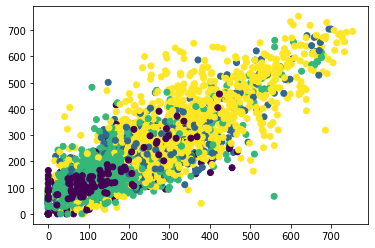

In [16]:
plt.scatter(datka['acc_z, mg_noise_more3hz_peaks_amplitude_max'],
            datka['acc_y, mg_noise_more3hz_peaks_amplitude_max'],
            c= datka['tremor_indentity'])
#mag_z, mga_noise_less3hz_peaks_freq_std          0.424581
# gyr_x, dps_noise_less3hz_peaks_freq_max  

In [14]:
def shuffler(df):
    # return the pandas dataframe
    return df.reindex(np.random.permutation(df.index))
# import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def CI_calculated(parkinson_df):
    df = parkinson_df.drop(index = ['exer_idx'])
    l_min = []
    l_max = []
    for col in df:
        x = df[col].values
        x = x[~np.isnan(x)]
        med, minim, maxim = mean_confidence_interval(x)
        l_min.append(minim)
        l_max.append(maxim)
    return l_min, l_max

In [18]:
datka.tremor_indentity.value_counts()

2    4610
0    2647
3    1437
1     500
Name: tremor_indentity, dtype: int64

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from fylearn.nfpc import FuzzyPatternClassifier
from fylearn.garules import MultimodalEvolutionaryClassifier
from fylearn.fpt import FuzzyPatternTreeTopDownClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import LinearSVC

FPC = FuzzyPatternClassifier()
MEC = MultimodalEvolutionaryClassifier(n_iterations= 20)
FPC = FuzzyPatternTreeTopDownClassifier()
parameters = {'n_estimators': np.arange(200, 501, 100), 'max_depth' : np.arange(10, 61, 10)}
RFС0 = RandomForestClassifier(n_estimators = 30, max_depth = 5, class_weight = 'balanced')
RFС1 = RandomForestClassifier(n_estimators = 130, max_depth = 35, class_weight = 'balanced')
RFС2 = RandomForestClassifier(n_estimators = 70, max_depth = 5, class_weight = 'balanced')
RFС3 = RandomForestClassifier(n_estimators = 130, max_depth = 5, class_weight = 'balanced')
RFС4 = RandomForestClassifier(n_estimators = 30, max_depth = 15, class_weight = 'balanced')
RFС5 = RandomForestClassifier(n_estimators = 50, max_depth = 15, class_weight = 'balanced')
RFС6 = RandomForestClassifier(n_estimators = 70, max_depth = 15, class_weight = 'balanced')
RFС7 = RandomForestClassifier(n_estimators = 90, max_depth = 15, class_weight = 'balanced')
RFС8 = RandomForestClassifier(n_estimators = 30, max_depth = 25, class_weight = 'balanced')
RFС9 = RandomForestClassifier(n_estimators = 50, max_depth = 25, class_weight = 'balanced')
RFС10= RandomForestClassifier(n_estimators = 70, max_depth = 25, class_weight = 'balanced')
RFС11= RandomForestClassifier(n_estimators = 90, max_depth = 25, class_weight = 'balanced')
RFС12= RandomForestClassifier(n_estimators = 100, max_depth = 35, class_weight = 'balanced')

# LinSVM = LinearSVC( probability= True, class_weight = 'balanced')
RbfSVM = SVC(kernel = 'rbf', probability= True, class_weight = 'balanced' )
PolySVM = SVC(kernel = 'poly', probability= True, class_weight = 'balanced')
KNN = KNeighborsClassifier()
NB = GaussianNB()
LR = LogisticRegression(class_weight= 'balanced')
DT = DecisionTreeClassifier(max_depth = 100, class_weight='balanced')
QDA = QuadraticDiscriminantAnalysis()
GP = GaussianProcessClassifier(1.0 * RBF(1.0))
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
classifiers = {
#      'RF 30 5' : RFС0,
#      'RF 130 35' : RFС1,
#      'RF 70 5' : RFС2,
#      'RF 130 5' : RFС3,
#      'RF 30 15' : RFС4,
#      'RF 50 15' : RFС5,
#      'RF 90 15' : RFС7,
#      'RF 30 25' : RFС8,
#      'RF 50 25' : RFС9,
#      'RF 70 25' : RFС10,
     'RF 90 25' : RFС11,
#      'RF 110 35' : RFС12,
    
#      'Linear SVM' : LinSVM,
     'rbf SVM' : RbfSVM,
#      'poly SVM': PolySVM,
#      'KNN' : KNN, 
#      'NB' : NB,
     'LR' : LR
#     'Adaboost' : AdaBoostClassifier(n_estimators = 50),
#     'SGD' : SGDClassifier(n_jobs= 4, class_weight= 'balanced' )
#      'DT' : DT,
#      'GaussProcess' : GP,
#      'QDA' : QDA
#      'Fuzzy Pattern' : FPC,
#      'MultiModalEvolutionary' : MEC,
#      'FuzzyPatternTreeTopDown' : FPC
}

In [20]:
count = 0
for col in features:
    if 'acc' in col:
        count+=1
count

156

In [16]:
acc_feat = [name for name in features.columns if 'acc' in name]
gyr_feat = [name for name in features.columns if 'gyr' in name]
mag_feat = [name for name in features.columns if 'mag' in name]

In [17]:
from sklearn.feature_selection import chi2
from tqdm import tqdm

In [18]:
def use_this_features(train_df, test_df, feat_name = None):  

    
    if feat_name:
        X_train = X_train[feat_name]
        X_test  = X_test[feat_name]
    else:
        
        a, b = chi2(X_train.abs(),y_train)
        ind = np.argsort(a)
        selected_names = list(X_train.columns[ind[:156]])

        X_test = test_df.drop(columns = ['name', 'exercise_index', 'target', 'tremor_indentity'])
        y_test = test_df.tremor_indentity.values
        X_train = X_train[selected_names]
        X_test  = X_test[selected_names]
        
    
    X_train = pm.sclr.fit_transform(X_train)
    X_test = pm.sclr.transform(X_test)
    return X_train, y_train, X_test, y_test

def small_predict(train_df, test_df, classifiers, accuracy, i=0, initial_feat_x = None, balanced_accuracy = True, predict_proba = False):
    
    X_train = train_df.drop(columns = ['name', 'exercise_index', 'target', 'tremor_indentity'])
    y_train = train_df.tremor_indentity.values
    X_test = test_df.drop(columns = ['name', 'exercise_index', 'target', 'tremor_indentity'])
    y_test = test_df.tremor_indentity.values
    
    if initial_feat_x:
        X_train = X_train[initial_feat_x]
        X_test  = X_test[initial_feat_x]
    feature_names = X_train.columns.copy()
    a, b = chi2(X_train.abs(),y_train)
    ind = np.argsort(a)
    selected_names = list(feature_names[ind])
#     print(len(selected_names))
#     for n_feat in range(50, len(selected_names), 100):
    n_feat = len(selected_names)
    X_train = pm.sclr.fit_transform(train_df[selected_names[:n_feat] ])
    X_test  = pm.sclr.transform(    test_df[ selected_names[:n_feat] ])
    for key in classifiers:
#         print(key)
        model = classifiers[key]
        model.fit(X_train, y_train)
        if predict_proba:
            y_pred = model.predict_proba(X_test)
            if key + ', n_feat= ' + str(n_feat) not in accuracy:
                accuracy[key + ', n_feat= ' + str(n_feat)] = []
            y_pred_arg = y_pred.argmax(axis = 1) + 1
            accuracy[key + ', n_feat= ' + str(n_feat)].append((y_pred, y_test, 
                                           pm.accuracy_score(y_test, y_pred_arg), pm.balanced_accuracy_score(y_test, y_pred_arg)))
            
        else:
            y_pred = model.predict(X_test)
            if key + ', n_feat= ' + str(n_feat) not in accuracy:
                accuracy[key + ', n_feat= ' + str(n_feat)] = []
            if balanced_accuracy:
                accuracy[key + ', n_feat= ' + str(n_feat)].append(pm.balanced_accuracy_score(y_pred, y_test))
            else:
                accuracy[key + ', n_feat= ' + str(n_feat)].append(pm.accuracy_score(y_pred, y_test))
#         print(n_feat, len(selected_names))

    if 'person' not in accuracy:
        accuracy['person'] = []
    accuracy['person'].append(i)
    return accuracy

In [19]:
import time

In [20]:
datka = datka[datka.tremor_indentity != 0]

In [29]:
accuracy['person']

NameError: name 'accuracy' is not defined

In [53]:
accuracy = {}
accuracy_acc = {}
accuracy_gyr = {}
accuracy_mag = {}
accuracy_without_acc = {}
accuracy_without_gyr = {}
accuracy_without_mag = {}
# results_per_person_pon = {}
df = datka
peoples = df.name.unique()
st = 0
for i in peoples:
    print(i, ', time:', time.time() - st)
    st = time.time()
#     if i in accuracy['person']:
#         continue
    st = time.time()
    train_df = shuffler(df[df['name'] != i])
    test_df  = df[df['name'] == i]
    
### Total Accuracy
    accuracy = small_predict(train_df, test_df, classifiers,
                             accuracy, i, predict_proba = True )
### Acc Accuracy    
    accuracy_acc = small_predict(train_df, test_df, classifiers, 
                             accuracy_acc, i, initial_feat_x = acc_feat, predict_proba = True)
    
    
### Gyr Accuracy    
    accuracy_gyr = small_predict(train_df, test_df, classifiers, 
                             accuracy_gyr, i, initial_feat_x = gyr_feat, predict_proba = True)
    
    
### Mag Accuracy    
    accuracy_mag = small_predict(train_df, test_df, classifiers,
                             accuracy_mag, i, initial_feat_x = mag_feat, predict_proba = True)

    accuracy_without_acc = small_predict(train_df, test_df, classifiers,
                             accuracy_without_acc, i, initial_feat_x = gyr_feat + mag_feat, predict_proba = True)
    
    
### Gyr Accuracy    
    accuracy_without_gyr = small_predict(train_df, test_df, classifiers,
                             accuracy_without_gyr, i, initial_feat_x = acc_feat + mag_feat, predict_proba = True)
    
    
### Mag Accuracy    
    accuracy_without_mag = small_predict(train_df, test_df, classifiers, 
                             accuracy_without_mag, i, initial_feat_x = gyr_feat + acc_feat, predict_proba = True)


20.0 , time: 1575056709.3258193
21.0 , time: 424.0670096874237
22.0 , time: 401.7791922092438
23.0 , time: 387.4234948158264
24.0 , time: 392.99955320358276
25.0 , time: 394.26171875
26.0 , time: 386.16084933280945
28.0 , time: 409.67140340805054
29.0 , time: 470.7518734931946
31.0 , time: 426.35807061195374
32.0 , time: 408.1851785182953
33.0 , time: 400.70465064048767
34.0 , time: 394.5591366291046
35.0 , time: 398.4222388267517
37.0 , time: 398.66781783103943
38.0 , time: 398.5625808238983
39.0 , time: 393.13669514656067
40.0 , time: 394.33527636528015
41.0 , time: 395.57248163223267
42.0 , time: 377.8623685836792
43.0 , time: 383.6757481098175
44.0 , time: 388.340185880661
45.0 , time: 398.245347738266
47.0 , time: 400.41391372680664
48.0 , time: 401.55377197265625
49.0 , time: 403.64149165153503
50.0 , time: 396.5368719100952
51.0 , time: 405.41404700279236
52.0 , time: 402.9275803565979
53.0 , time: 400.74867010116577
54.0 , time: 385.4443199634552
55.0 , time: 385.89602875709534

In [28]:
# n = 0
# for key in accuracy:
#     print(accuracy[key][n][2], accuracy[key][n][3])

In [ ]:
# pd.DataFrame(accuracy).drop(columns = ['person']).mean()

In [ ]:
# pd.DataFrame(accuracy_acc).drop(columns = ['person']).mean().max(),pd.DataFrame(accuracy_gyr).drop(columns = ['person']).mean().max(), pd.DataFrame(accuracy_mag).drop(columns = ['person']).mean().max()

In [ ]:
# pd.DataFrame(accuracy_without_acc).drop(columns = ['person']).mean().max(),pd.DataFrame(accuracy_without_gyr).drop(columns = ['person']).mean().max(), pd.DataFrame(accuracy_without_mag).drop(columns = ['person']).mean().max()

In [54]:
acc_per_sensor = {}
acc_per_sensor['all'] = accuracy

acc_per_sensor['acc'] = accuracy_acc
acc_per_sensor['gyr'] = accuracy_gyr
acc_per_sensor['mag'] = accuracy_mag

acc_per_sensor['without_acc'] = accuracy_without_acc
acc_per_sensor['without_gyr'] = accuracy_without_gyr
acc_per_sensor['without_mag'] = accuracy_without_mag

In [63]:
accuracy

{'RF 90 25, n_feat= 468': [(array([[0.12222222, 0.78888889, 0.08888889],
          [0.02222222, 0.93333333, 0.04444444],
          [0.03333333, 0.93333333, 0.03333333],
          [0.06666667, 0.83333333, 0.1       ],
          [0.14442096, 0.53335682, 0.32222222],
          [0.04444444, 0.68888889, 0.26666667],
          [0.05555556, 0.7       , 0.24444444],
          [0.07777778, 0.49162244, 0.43059978],
          [0.        , 0.94444444, 0.05555556],
          [0.02222222, 0.95555556, 0.02222222],
          [0.02222222, 0.93333333, 0.04444444],
          [0.02222222, 0.96666667, 0.01111111],
          [0.01111111, 0.96666667, 0.02222222],
          [0.02222222, 0.94444444, 0.03333333],
          [0.        , 0.98888889, 0.01111111],
          [0.        , 1.        , 0.        ],
          [0.04444444, 0.95555556, 0.        ],
          [0.01111111, 0.98888889, 0.        ],
          [0.04444444, 0.94444444, 0.01111111],
          [0.02222222, 0.97777778, 0.        ],
          [0.  

In [55]:
with open('C:/Files/parkinson/acc_per_sensor.pkl', 'wb') as config_dictionary_file:
    pickle.dump(acc_per_sensor, config_dictionary_file)

In [27]:
with open('C:/Files/parkinson/acc_per_sensor.pkl', 'rb') as config_dictionary_file:
    acc_per_sensor = pickle.load(config_dictionary_file)
 

In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, auc
from scipy import interp
from itertools import cycle
import sklearn
labels = ['rest', 'kinetic', 'postural']

def get_from_lst(z):
    for i, (pp,rr,aa,bb) in enumerate(z):
        if i == 0 :
            pred = pp
            real = rr
            acc = [aa]
            bal = [bb]
        else:
            pred = np.concatenate((pred, pp))
            real = np.concatenate((real, rr))
            acc.append(aa)
            bal.append(bb)
    return pred, real, acc, bal
def get_from_dict(fulldct):
    result_dct = dict()
    for keykey in fulldct:
        
        if keykey == 'done':
            continue
        dct = fulldct[keykey]
        predict_v = dict()
        true_v = dict()
        accuracy_v = dict()
        balanced_v = dict()
        print(keykey)
        for key in dct:
            if key == 'person':
                continue
            z = dct[key]
            print(key)
            pred, real, acc, bal = get_from_lst(z)
            predict_v[key] = pred
            true_v[key] = real
            accuracy_v[key] = acc
            balanced_v[key] = bal
        result_dct[keykey] = (predict_v, true_v, accuracy_v, balanced_v)
    return result_dct
        #     break
def get_fpr_tpr(real_total1, pred_total1, N_classes = 12):
    y = label_binarize(real_total1-1, classes= np.arange(N_classes))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(N_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], pred_total1[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), pred_total1.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(N_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(N_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= N_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    return fpr, tpr, roc_auc

In [29]:
model_name = [ "RF",  "SVM", 'LR' ]

In [36]:
labels

['rest', 'kinetic', 'postural']

In [30]:
result_dct = get_from_dict(acc_per_sensor)

In [57]:
acc_to_cv = {}
for keykey in result_dct:
    dct = result_dct[keykey]
    print(keykey)
    for o, key in enumerate(dct[0]):
        pred = dct[0][key]
        real = dct[1][key]
        acc_to_cv[key] = dct[2][key]
        fpr, tpr, roc_auc = get_fpr_tpr(real, pred, N_classes= 3)
        
        print( key, '\n', sklearn.metrics.classification_report(real, pred.argmax(axis = 1) + 1, target_names = labels))
#     break
    print('\n\n\n')

all
RF 90 25, n_feat= 468 
               precision    recall  f1-score   support

        rest       0.83      0.50      0.62       500
     kinetic       0.94      0.98      0.96      4610
    postural       0.87      0.89      0.88      1437

    accuracy                           0.92      6547
   macro avg       0.88      0.79      0.82      6547
weighted avg       0.92      0.92      0.92      6547

rbf SVM, n_feat= 468 
               precision    recall  f1-score   support

        rest       0.68      0.48      0.56       500
     kinetic       0.91      0.97      0.94      4610
    postural       0.88      0.78      0.83      1437

    accuracy                           0.89      6547
   macro avg       0.82      0.75      0.78      6547
weighted avg       0.89      0.89      0.89      6547

LR, n_feat= 468 
               precision    recall  f1-score   support

        rest       0.65      0.71      0.68       500
     kinetic       0.96      0.95      0.96      4610
    po

array([[0.94570136, 0.90825688, 0.96832579, 0.96938776, 0.9483871 ,
        0.92962963, 0.94166667, 0.89767442, 0.98319328, 0.97590361,
        0.98445596, 0.95789474, 0.85815603, 0.91525424, 0.91975309,
        0.9689441 , 0.94520548, 0.96402878, 0.79858657, 0.92607004,
        0.8582996 , 0.99115044, 0.89719626, 0.97196262, 0.88235294,
        0.88590604, 0.97196262, 0.87777778, 0.9047619 , 0.92282958,
        0.88209607, 0.94444444, 0.87837838, 0.92880259, 0.9453125 ,
        0.87162162, 0.98148148, 0.95172414, 0.85      , 0.70833333,
        0.82608696],
       [0.95022624, 0.8440367 , 0.92307692, 0.96938776, 0.9483871 ,
        0.85185185, 0.83333333, 0.87906977, 0.93277311, 0.87951807,
        0.92227979, 0.95263158, 0.83687943, 0.90677966, 0.88888889,
        0.95031056, 0.89726027, 0.92086331, 0.77385159, 0.91050584,
        0.86639676, 0.96460177, 0.91588785, 0.91588785, 0.85294118,
        0.87248322, 0.90654206, 0.9       , 0.9047619 , 0.83279743,
        0.89956332, 0.91880

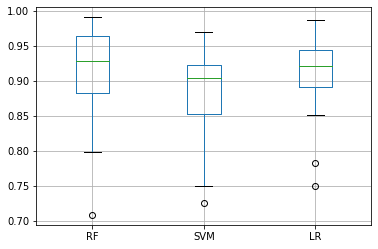

In [55]:
# sns.barplot(data = pd.DataFrame(data = np.array(list(acc_to_cv.values())).T, columns = model_name)
# )
# plt.title("Accuracy, Tremor Classification")
# # plt.xlabel('Exercise index')
# plt.ylabel('Accuracy')
pd.DataFrame(data = np.array(list(acc_to_cv.values())).T, columns = model_name).boxplot()

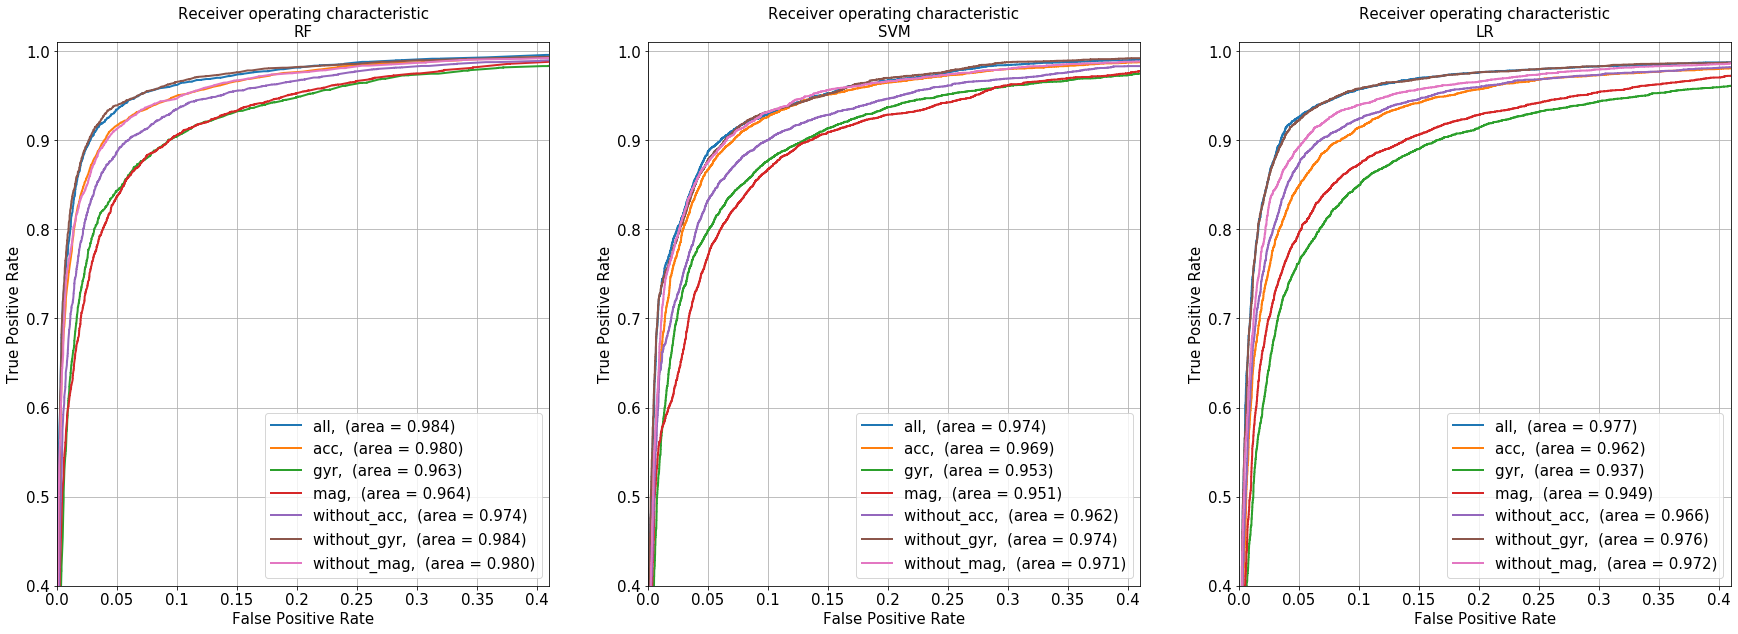

In [72]:
f, ax = plt.subplots(1, 3, figsize = (30,10))

for keykey in result_dct:
    dct = result_dct[keykey]

    for o, key in enumerate(dct[0]):
        pred = dct[0][key]
        real = dct[1][key]
        fpr, tpr, roc_auc = get_fpr_tpr(real, pred, N_classes= 3)
        #     print(sklearn.metrics.classification_report(real, pred.argmax(axis = 1) + 1))

        #     fpr, tpr, roc_auc = get_fpr_tpr(real_total1, pred_total1)

        #     plt.plot(fpr["macro"], tpr["macro"],
        #              label='macro-average ROC curve (area = {0:0.3f})'
        #                    ''.format(roc_auc["macro"]),
        #              color='navy', linestyle=':', linewidth=5)

        ax[o].plot(fpr["micro"], tpr["micro"],
                 label= keykey + ',  (area = {0:0.3f})' 
                       ''.format(roc_auc["micro"]), linewidth=2,
        #              color='deeppink', linestyle=':'
                )

        #     colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'g', 'b', 'r', 'y', 'k', 'c', 'm', ])
        #     for i, color in zip(range(3), colors):
        # #         print(i, labels[i], roc_auc[i], color, i)
        #         plt.plot(fpr[i], tpr[i], color=color, lw=2,
        #                  label= labels[i] +
        #                  ' (area = %.3f)' % roc_auc[i], alpha = 0.5)
FS = 15
for o, a in enumerate(ax):
#     a.semilogx([0, 1], [0, 1], 'k--', lw=2)
    a.set_xlim([0.0, 0.41])
    a.set_ylim([0.4, 1.01])
    a.set_xlabel('False Positive Rate', fontsize= FS)
    a.set_ylabel('True Positive Rate', fontsize= FS)
    a.set_title('Receiver operating characteristic\n' + model_name[o], fontsize= FS)
    a.legend(loc="up right", fontsize= FS)
    a.grid()
    a.set_xticklabels(np.arange(0, 41, 5)/100, fontsize = FS)
    a.set_yticklabels(np.arange(40, 101, 10)/100, fontsize = FS)

#     a.show()
#     break

In [47]:
pd.DataFrame(balanced_v).mean()

RF 90 25, n_feat= 468    0.762316
rbf SVM, n_feat= 468     0.724899
LR, n_feat= 468          0.843101
dtype: float64

In [36]:
pred.shape, real.shape, len(acc), len(bal)

((6547, 3), (6547,), 41, 41)

In [28]:
z['RF 90 25, n_feat= 312'][0][2]

0.9457013574660633

In [31]:
datka.tremor_indentity.value_counts()

2    4610
3    1437
1     500
Name: tremor_indentity, dtype: int64

In [33]:
# best_model_name = {key : acc_per_sensor[key].mean().sort_values().keys()[-2] for key in acc_per_sensor}
# best_model_accuracy = {key : acc_per_sensor[key].mean().sort_values().values[-2] for key in acc_per_sensor}


In [ ]:
# best_model_accuracy#, best_model_name

In [22]:
with open('C:/Files/parkinson/acc_pon_per_sensor.pkl', 'rb') as config_dictionary_file:
    acc_pon_per_sensor = pickle.load(config_dictionary_file)

In [23]:
acc_pon_per_sensor['all']['person']

[2.0,
 4.0,
 6.0,
 8.0,
 10.0,
 12.0,
 14.0,
 16.0,
 18.0,
 20.0,
 22.0,
 24.0,
 26.0,
 28.0,
 30.0,
 32.0,
 34.0,
 36.0,
 38.0,
 40.0,
 42.0,
 44.0,
 46.0,
 48.0,
 50.0,
 52.0,
 54.0,
 56.0,
 58.0,
 60.0,
 62.0,
 64.0,
 66.0,
 68.0]

In [56]:
for keykey in acc_pon_per_sensor:
    if keykey == 'done':
        continue
    for key in acc_pon_per_sensor[keykey]:
        print(keykey, key, len(acc_pon_per_sensor[keykey][key]))
        if len(acc_pon_per_sensor[keykey][key]) > 22:
            acc_pon_per_sensor[keykey][key].pop()

all RF 90 25, n_feat= 468 22
all rbf SVM, n_feat= 468 22
all LR, n_feat= 468 22
all person 22
acc RF 90 25, n_feat= 156 22
acc rbf SVM, n_feat= 156 22
acc LR, n_feat= 156 22
acc person 22
gyr RF 90 25, n_feat= 156 22
gyr rbf SVM, n_feat= 156 22
gyr LR, n_feat= 156 22
gyr person 22
mag RF 90 25, n_feat= 156 22
mag rbf SVM, n_feat= 156 22
mag LR, n_feat= 156 22
mag person 22
without_acc RF 90 25, n_feat= 312 22
without_acc rbf SVM, n_feat= 312 22
without_acc LR, n_feat= 312 22
without_acc person 22
without_gyr RF 90 25, n_feat= 312 22
without_gyr rbf SVM, n_feat= 312 22
without_gyr LR, n_feat= 312 22
without_gyr person 22
without_mag RF 90 25, n_feat= 312 22
without_mag rbf SVM, n_feat= 312 22
without_mag LR, n_feat= 312 22
without_mag person 22


In [24]:
accuracy_pon = acc_pon_per_sensor['all']

accuracy_pon_acc = acc_pon_per_sensor['acc'] 
accuracy_pon_gyr = acc_pon_per_sensor['gyr'] 
accuracy_pon_mag = acc_pon_per_sensor['mag'] 

accuracy_pon_without_acc = acc_pon_per_sensor['without_acc'] 
accuracy_pon_without_gyr = acc_pon_per_sensor['without_gyr'] 
accuracy_pon_without_mag = acc_pon_per_sensor['without_mag'] 

In [25]:
target = features.target
tremor_type = target.map({0:0, 1:1, 2:1, 3:1, 4:2})
features['tremor_indentity'] = tremor_type + 1
datka = features
# done = acc_pon_per_sensor['done']

In [26]:
(features.name[0] % 2 == 1)

True

In [27]:
import time
# accuracy_pon = {}
# accuracy_pon_acc = {}
# accuracy_pon_gyr = {}
# accuracy_pon_mag = {}
# accuracy_pon_without_acc = {}
# accuracy_pon_without_gyr = {}
# accuracy_pon_without_mag = {}
# results_per_person_pon = {}
df = datka
peoples = df.name.unique()
st = 0
for i in peoples:
    if i % 2 == 0:
        continue
    print(i, ', time:', time.time() - st)
    st = time.time()
#     if i in accuracy_pon['person']:
#         continue
    st = time.time()
    train_df = shuffler(df[df['name'] != i])
    test_df  = df[df['name'] == i]
    
### Total accuracy_pon
    accuracy_pon = small_predict(train_df, test_df, classifiers,
                             accuracy_pon, i, balanced_accuracy= False, predict_proba = True)
### Acc accuracy_pon    
    accuracy_pon_acc = small_predict(train_df, test_df, classifiers, 
                             accuracy_pon_acc, i, initial_feat_x = acc_feat, balanced_accuracy= False, predict_proba = True)
    
    
# # # # ### Gyr accuracy_pon    
    accuracy_pon_gyr = small_predict(train_df, test_df, classifiers, 
                             accuracy_pon_gyr, i, initial_feat_x = gyr_feat, balanced_accuracy= False, predict_proba = True)
    
    
# # # ### Mag accuracy_pon    
    accuracy_pon_mag = small_predict(train_df, test_df, classifiers,
                             accuracy_pon_mag, i, initial_feat_x = mag_feat, balanced_accuracy= False, predict_proba = True)

# # # ### Acc accuracy_pon    
    accuracy_pon_without_acc = small_predict(train_df, test_df, classifiers,
                             accuracy_pon_without_acc, i, initial_feat_x = gyr_feat + mag_feat, balanced_accuracy= False, predict_proba = True)
    
    
# # # ### Gyr accuracy_pon    
    accuracy_pon_without_gyr = small_predict(train_df, test_df, classifiers,
                             accuracy_pon_without_gyr, i, initial_feat_x = acc_feat + mag_feat, balanced_accuracy= False, predict_proba = True)
    
    
# # # ### Mag accuracy_pon    
    accuracy_pon_without_mag = small_predict(train_df, test_df, classifiers, 
                             accuracy_pon_without_mag, i, initial_feat_x = gyr_feat + acc_feat, balanced_accuracy= False, predict_proba = True)

1.0 , time: 1575316000.144797
3.0 , time: 1407.7874579429626
5.0 , time: 1353.5047056674957
7.0 , time: 1198.347596168518
9.0 , time: 1190.6886510849
11.0 , time: 1185.1125209331512
13.0 , time: 1191.461207151413
15.0 , time: 1195.7201182842255
17.0 , time: 1192.468495607376
19.0 , time: 1195.536034822464
21.0 , time: 1193.9020228385925
23.0 , time: 1186.085938692093
25.0 , time: 1158.6708805561066
27.0 , time: 1161.1024153232574
29.0 , time: 1191.327487707138
31.0 , time: 1177.9049017429352
33.0 , time: 1193.0666570663452
35.0 , time: 1163.8719143867493
37.0 , time: 1181.609457731247
39.0 , time: 1172.6769907474518
41.0 , time: 1172.0176134109497
43.0 , time: 1147.9701180458069
45.0 , time: 1154.0908091068268
47.0 , time: 1185.4462490081787
49.0 , time: 1183.4749462604523
51.0 , time: 1178.9010756015778
53.0 , time: 1189.7212810516357
55.0 , time: 1134.3619401454926
57.0 , time: 1150.0451724529266
59.0 , time: 1148.11252784729
63.0 , time: 1172.604392528534
65.0 , time: 1202.647914648

In [60]:
done = accuracy_pon_without_mag['person']

In [54]:
accuracy_pon_without_acc

{'RF 90 25, n_feat= 312': [(array([[0.53333333, 0.28888889, 0.17777778],
          [0.45555556, 0.35555556, 0.18888889],
          [0.64441355, 0.20003089, 0.15555556],
          [0.53330244, 0.25558645, 0.21111111],
          [0.55555556, 0.25555556, 0.18888889],
          [0.7       , 0.14444444, 0.15555556],
          [0.57777778, 0.21111111, 0.21111111],
          [0.5       , 0.3       , 0.2       ],
          [0.28888889, 0.48888889, 0.22222222],
          [0.39996911, 0.35558645, 0.24444444],
          [0.48888889, 0.25555556, 0.25555556],
          [0.35552466, 0.40003089, 0.24444444],
          [0.37777778, 0.36666667, 0.25555556],
          [0.35555556, 0.32244135, 0.32200309],
          [0.18888889, 0.57777778, 0.23333333],
          [0.25555556, 0.48888889, 0.25555556],
          [0.58868221, 0.28888889, 0.1224289 ],
          [0.55534887, 0.32222222, 0.1224289 ],
          [0.59920721, 0.21189471, 0.18889808],
          [0.55555556, 0.18888889, 0.25555556],
          [0.87

In [30]:
acc_pon_per_sensor['without_mag']['person']

[2.0,
 4.0,
 6.0,
 8.0,
 10.0,
 12.0,
 14.0,
 16.0,
 18.0,
 20.0,
 22.0,
 24.0,
 26.0,
 28.0,
 30.0,
 32.0,
 34.0,
 36.0,
 38.0,
 40.0,
 42.0,
 44.0,
 46.0,
 48.0,
 50.0,
 52.0,
 54.0,
 56.0,
 58.0,
 60.0,
 62.0,
 64.0,
 66.0,
 68.0,
 1.0,
 3.0,
 5.0,
 7.0,
 9.0,
 11.0,
 13.0,
 15.0,
 17.0,
 19.0,
 21.0,
 23.0,
 25.0,
 27.0,
 29.0,
 31.0,
 33.0,
 35.0,
 37.0,
 39.0,
 41.0,
 43.0,
 45.0,
 47.0,
 49.0,
 51.0,
 53.0,
 55.0,
 57.0,
 59.0,
 63.0,
 65.0,
 67.0,
 69.0]

In [29]:
acc_pon_per_sensor = {}
# acc_pon_per_sensor['done'] = done

acc_pon_per_sensor['all'] = accuracy_pon

acc_pon_per_sensor['acc'] = accuracy_pon_acc
acc_pon_per_sensor['gyr'] = accuracy_pon_gyr
acc_pon_per_sensor['mag'] = accuracy_pon_mag

acc_pon_per_sensor['without_acc'] = accuracy_pon_without_acc
acc_pon_per_sensor['without_gyr'] = accuracy_pon_without_gyr
acc_pon_per_sensor['without_mag'] = accuracy_pon_without_mag

In [35]:
with open('C:/Files/parkinson/acc_pon_per_sensor.pkl', 'wb') as config_dictionary_file:
    pickle.dump(acc_pon_per_sensor, config_dictionary_file)

In [71]:
best_model_name = {key : acc_pon_per_sensor[key].mean().sort_values().keys()[-2] for key in acc_pon_per_sensor}
best_model_acc_ponuracy = {key : acc_pon_per_sensor[key].mean().sort_values().values[-2] for key in acc_pon_per_sensor}
best_model_acc_ponuracy

AttributeError: 'dict' object has no attribute 'mean'

In [89]:
result_dct = {}
predict_v = dict()
true_v = dict()
accuracy_v = dict()
balanced_v = dict()
# print(keykey)
dct = acc_pon_per_sensor['all']
for key in dct:
    if key == 'person':
        continue
    z = dct[key]
    print(key)
    pred, real, acc, bal = get_from_lst(z)
    predict_v[key] = pred
    true_v[key] = real
    accuracy_v[key] = acc
    balanced_v[key] = bal
result_dct[keykey] = (predict_v, true_v, accuracy_v, balanced_v)

without_mag
RF 90 25, n_feat= 468
rbf SVM, n_feat= 468
LR, n_feat= 468


In [92]:
acc_pon_per_sensor['gyr']

{'RF 90 25, n_feat= 156': [0.6275510204081632,
  0.7096774193548387,
  0.13333333333333333,
  0.8666666666666667,
  0.5,
  0.13953488372093023,
  0.5714285714285714,
  0.6333333333333333,
  0.2891566265060241,
  0.10362694300518134,
  0.531578947368421,
  0.7659574468085106,
  0.6949152542372882,
  0.25252525252525254,
  0.09259259259259259,
  0.13664596273291926,
  0.773972602739726,
  0.07194244604316546,
  0.8586572438162544,
  0.5914396887159533,
  0.7813765182186235,
  0.8584070796460177,
  0.6822429906542056,
  0.4367816091954023,
  0.6261682242990654,
  0.7450980392156863,
  0.5973154362416108,
  0.5046728971962616,
  0.4666666666666667,
  0.8666666666666667,
  0.8070739549839229,
  0.6375545851528385,
  0.08547008547008547,
  0.8153153153153153,
  0.12944983818770225,
  0.6796875,
  0.7094594594594594,
  0.7870370370370371,
  0.1793103448275862,
  0.875,
  0.0,
  1.0,
  0.08333333333333333,
  0.16,
  0.13333333333333333,
  0.21212121212121213],
 'rbf SVM, n_feat= 156': [0.36224

In [88]:
acc_pon_per_sensor['all'].keys()

dict_keys(['RF 90 25, n_feat= 468', 'rbf SVM, n_feat= 468', 'LR, n_feat= 468', 'person'])

In [31]:
result_dct = get_from_dict(acc_pon_per_sensor)

all
RF 90 25, n_feat= 468
rbf SVM, n_feat= 468
LR, n_feat= 468
acc
RF 90 25, n_feat= 156
rbf SVM, n_feat= 156
LR, n_feat= 156
gyr
RF 90 25, n_feat= 156
rbf SVM, n_feat= 156
LR, n_feat= 156
mag
RF 90 25, n_feat= 156
rbf SVM, n_feat= 156
LR, n_feat= 156
without_acc
RF 90 25, n_feat= 312
rbf SVM, n_feat= 312
LR, n_feat= 312
without_gyr
RF 90 25, n_feat= 312
rbf SVM, n_feat= 312
LR, n_feat= 312
without_mag
RF 90 25, n_feat= 312
rbf SVM, n_feat= 312
LR, n_feat= 312


In [32]:
acc_to_cv = {}
for keykey in result_dct:
    dct = result_dct[keykey]
    print(keykey)
    for o, key in enumerate(dct[0]):
        pred = dct[0][key]
        real = dct[1][key]
        acc_to_cv[key] = dct[2][key]
        fpr, tpr, roc_auc = get_fpr_tpr(real, pred, N_classes= 3)
        
        print( key, '\n', sklearn.metrics.classification_report(real, pred.argmax(axis = 1) + 1, target_names = labels))
#     break
    print('\n\n\n')

all
RF 90 25, n_feat= 468 
               precision    recall  f1-score   support

        rest       0.71      0.70      0.70      2647
     kinetic       0.55      0.75      0.64      4170
    postural       0.25      0.09      0.13      2377

    accuracy                           0.57      9194
   macro avg       0.50      0.51      0.49      9194
weighted avg       0.52      0.57      0.52      9194

rbf SVM, n_feat= 468 
               precision    recall  f1-score   support

        rest       0.66      0.58      0.62      2647
     kinetic       0.52      0.66      0.58      4170
    postural       0.30      0.20      0.24      2377

    accuracy                           0.52      9194
   macro avg       0.49      0.48      0.48      9194
weighted avg       0.50      0.52      0.50      9194

LR, n_feat= 468 
               precision    recall  f1-score   support

        rest       0.67      0.74      0.71      2647
     kinetic       0.58      0.56      0.57      4170
    po

In [33]:
acc_pon_per_sensor['all']

{'RF 90 25, n_feat= 468': [(array([[0.63312994, 0.27787687, 0.08899319],
          [0.67777778, 0.17777778, 0.14444444],
          [0.64424105, 0.18898798, 0.16677097],
          [0.55535216, 0.27787687, 0.16677097],
          [0.67757438, 0.17787687, 0.14454875],
          [0.87757438, 0.07787687, 0.04454875],
          [0.55535216, 0.34454354, 0.1001043 ],
          [0.64444444, 0.21111111, 0.14444444],
          [0.27777778, 0.48888889, 0.23333333],
          [0.4       , 0.41111111, 0.18888889],
          [0.48868549, 0.30009909, 0.21121541],
          [0.37777778, 0.42222222, 0.2       ],
          [0.37757438, 0.38898798, 0.23343764],
          [0.25555556, 0.48888889, 0.25555556],
          [0.18888889, 0.47777778, 0.33333333],
          [0.26666667, 0.36666667, 0.36666667],
          [0.64439697, 0.26671414, 0.08888889],
          [0.66657884, 0.26675449, 0.06666667],
          [0.52222222, 0.35555556, 0.12222222],
          [0.53329298, 0.25559591, 0.21111111],
          [0.9 

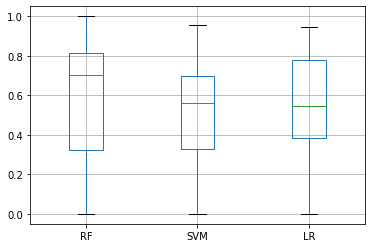

In [37]:
pd.DataFrame(acc_to_cv)[['RF 90 25, n_feat= 468', 'rbf SVM, n_feat= 468', 'LR, n_feat= 468']].values

pd.DataFrame(data = pd.DataFrame(acc_to_cv)[['RF 90 25, n_feat= 468', 'rbf SVM, n_feat= 468', 'LR, n_feat= 468']].values,
             columns = model_name).boxplot()

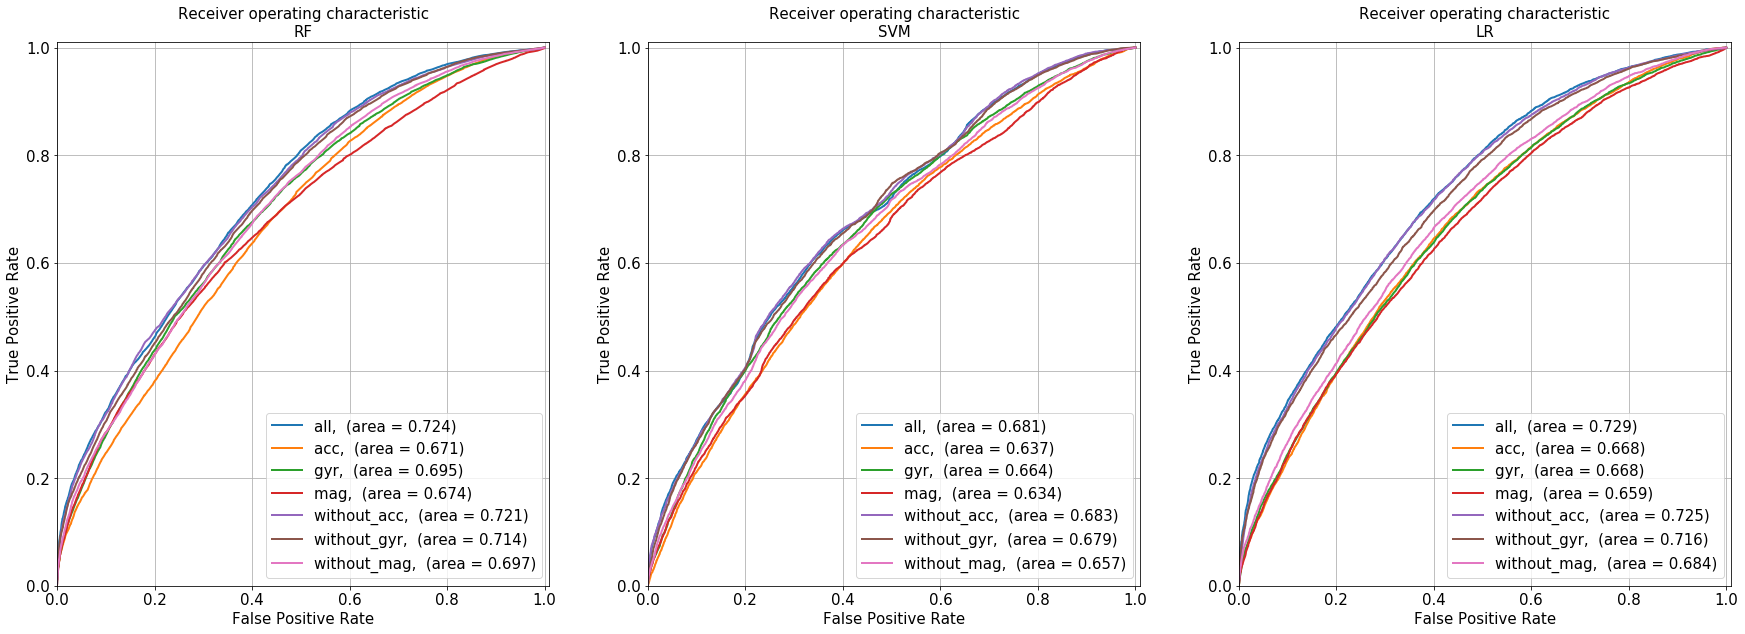

In [38]:
f, ax = plt.subplots(1, 3, figsize = (30,10))
model_name = ['RF', 'SVM', 'LR']
for keykey in result_dct:
    dct = result_dct[keykey]

    for o, key in enumerate(dct[0]):
        pred = dct[0][key]
        real = dct[1][key]
        fpr, tpr, roc_auc = get_fpr_tpr(real, pred, N_classes= 3)
        #     print(sklearn.metrics.classification_report(real, pred.argmax(axis = 1) + 1))

        #     fpr, tpr, roc_auc = get_fpr_tpr(real_total1, pred_total1)

        #     plt.plot(fpr["macro"], tpr["macro"],
        #              label='macro-average ROC curve (area = {0:0.3f})'
        #                    ''.format(roc_auc["macro"]),
        #              color='navy', linestyle=':', linewidth=5)

        ax[o].plot(fpr["macro"], tpr["macro"],
                 label= keykey + ',  (area = {0:0.3f})' 
                       ''.format(roc_auc["macro"]), linewidth=2,
        #              color='deeppink', linestyle=':'
                )

        #     colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'g', 'b', 'r', 'y', 'k', 'c', 'm', ])
        #     for i, color in zip(range(3), colors):
        # #         print(i, labels[i], roc_auc[i], color, i)
        #         plt.plot(fpr[i], tpr[i], color=color, lw=2,
        #                  label= labels[i] +
        #                  ' (area = %.3f)' % roc_auc[i], alpha = 0.5)
FS = 15
for o, a in enumerate(ax):
#     a.semilogx([0, 1], [0, 1], 'k--', lw=2)
    a.set_xlim([0.0, 1.01])
    a.set_ylim([0.0, 1.01])
    a.set_xlabel('False Positive Rate', fontsize= FS)
    a.set_ylabel('True Positive Rate', fontsize= FS)
    a.set_title('Receiver operating characteristic\n' + model_name[o], fontsize= FS)
    a.legend(loc="up right", fontsize= FS)
    a.grid()
    a.set_xticklabels(np.arange(0, 101, 20)/100, fontsize = FS)
    a.set_yticklabels(np.arange(0, 101, 20)/100, fontsize = FS)

#     a.show()
#     break